In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
olistbr_brazilian_ecommerce_path = kagglehub.dataset_download('olistbr/brazilian-ecommerce')
mohabovic_eda_satisfaction_prediction_nlp_rfm_deployment_path = kagglehub.notebook_output_download('mohabovic/eda-satisfaction-prediction-nlp-rfm-deployment')

print('Data source import complete.')


Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Data source import complete.


# <center> EDA + Satisfaction Prediction + Reviews NLP + RFM Analysis + Deployment

## Table of Contents
1.0 Introduction

2.0 Data loading

3.0 Data Cleaning

        3.1 Merging ALL Dataframes

        3.2 Handling Missing Values

        3.3 Drop Duplicates

        3.4 Feature Engineering

4.0 Exploratory Data Analysis (EDA)

        6.1 Univariate Analysis

        6.2 Multivariate Analysis
    
5.0 - Data preprocesing

        6.1 Data encoding

        6.2 Feature scaling

        6.3 Handle imbalance
        
6.0 - Modeling

        6.1 Apply ML models

        6.2 Hyperparameter Tuning
        
7.0 - Pipeline

8.0 - NLP For Customer Satisfaction

9.0 - Customer Segmentation

        9.1 Customer Segmentation by RFM Analysis

        9.2 Customer Segmentation by K-Means

10.0 - Model Deployment (Classification & Clustering)

11.0 - Wrap up & Conclusion

# 1.0 Introduction
## This project is about "Olist", a Brazilian ecommerce store which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil where its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

## Overview of Final Web App

<iframe width="1042" height="586" src="https://www.youtube.com/embed/O2nNUcj35ik" title="E-commerce Project Deloyment" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# 2.0 Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read All Files

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [ ]:
customers_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
geolocation_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
items_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
payments_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
products_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
sellers_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

### "Customers" Dataset

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### "Geolocation" Dataset

In [ ]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### "Order items" Dataset

In [ ]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### "Order Payments" Dataset

In [ ]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### "Order Reviews" Dataset

In [ ]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### "Orders" Dataset

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### "Products" Dataset

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### "Sellers" Dataset

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### "Product Category Name Translation" Dataset

In [ ]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 3.0 Data Cleaning

### 3.1 Merging All Dataframes

In [ ]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(reviews_df, on="order_id", how='inner')
df= df.merge(items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

### Show All Features

In [ ]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

#### Check duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

### 3.2 Handling Missing Values

In [ ]:
# Number of Missing Values for the first half of features

df.isna().sum()[:20]

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1195


##### Drop All Missing Values in datetime columns

In [ ]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### Keep " review_comment_message " & " review_comment_title "  Features ( Will be handled later )

In [ ]:
# Number of Missing Values for the Second half of features

df.isna().sum()[20:]

,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1


##### Check the missing values

In [ ]:
df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
60893,NaN,NaN,NaN,NaN


In [ ]:
# Since all the missing values are in the same raw, we will drop this raw
df.drop(27352, inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True)

### 3.3 Feature Engineering

##### Classify Products Categories (71) into 9 main Categories

In [ ]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [ ]:
df.product_category.value_counts()

,count
product_category,
Electronics,29568
Furniture,28050
Entertainment,13507
Beauty & Health,13283
Home & Garden,12848
Fashion,9722
Books & Stationery,3427
Industry & Construction,1633
Food & Drinks,1155


##### Combine Width, Height and Length to get Product Volume

In [ ]:
# Create Volume Column
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

# Drop Width, Height and Length
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

#### Convert Datetime features from Object to Datetime

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], errors='coerce')
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')

##### Extract duration of estimated shipping from purchasing date untill estimated delivery date

In [ ]:
df['estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days


##### Extract duration of shipping from purchasing date until delivered to customer date

In [ ]:
df['arrival_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

##### Extract duration of shipping from purchasing carrier delivered date untill delivered to customer

In [ ]:
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

##### Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"

In [ ]:
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##### Shipping status from Seller to Carrier

In [ ]:
# First get seller to carrier duration in days
df['seller_to_carrier_status'] = (df['shipping_limit_date'] - df['order_delivered_carrier_date']).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

##### Shipping status from Carrier to Customer

In [ ]:
# First get difference between estimated delivery date and actual delivery date in days
df['arrival_status'] = (df['order_estimated_delivery_date']- df['order_delivered_customer_date']).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

#### Show statistics of new Features

In [ ]:
df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,113135.000000,113135.000000,113135.000000
mean,23.469970,11.979626,8.721298
std,8.825545,9.362979,8.537974
min,2.000000,0.000000,0.000000
25%,18.000000,6.000000,4.000000
50%,23.000000,10.000000,7.000000
75%,28.000000,15.000000,11.000000
max,155.000000,208.000000,205.000000


#### Remove Outliers in both features ( More than 60 days )

In [ ]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated delivery time

In [ ]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'

    elif x in range(8, 16):
        return 'Fast'

    elif x in range(16, 25):
        return 'Neutral'

    elif x in range(25, 40):
        return 'Slow'

    else:
        return 'Very Slow'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)

df['arrival_delivery_rate'] = df.arrival_days.apply(rates)

df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

# 4.0 Exploratory Data Analysis ( EDA )

### 4.1 Univariate Analysis

##### Top 10 Customers Capacity Cities

/tmp/ipython-input-3623258296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')


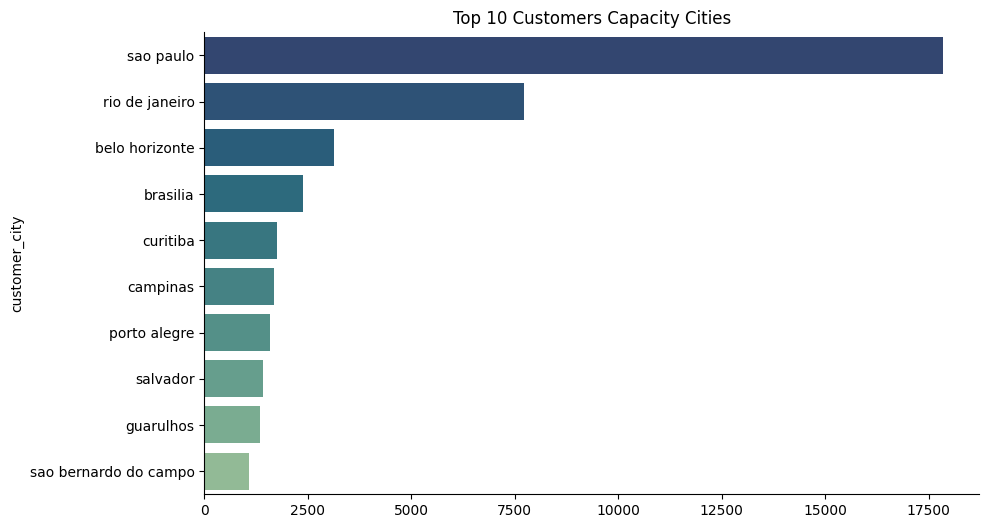

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

##### Top 10 Customers Capacity States

/tmp/ipython-input-2658243024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')


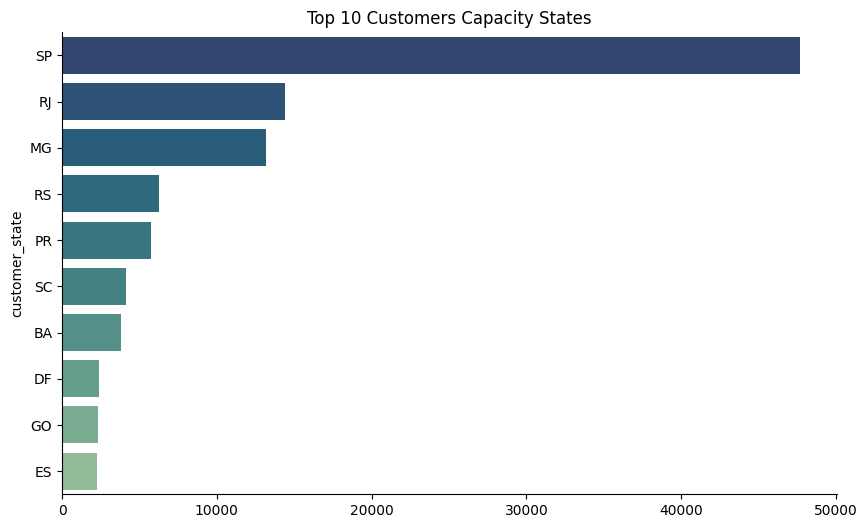

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

##### "Order_Status"

In [ ]:
df.order_status.value_counts()

,count
order_status,
delivered,112560
canceled,7


#### Due to the Extreme imbalance and lack of variance in the feature, we should drop it

In [ ]:
df.drop('order_status', axis=1, inplace=True)

##### " Review_Score "

/tmp/ipython-input-451649956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')


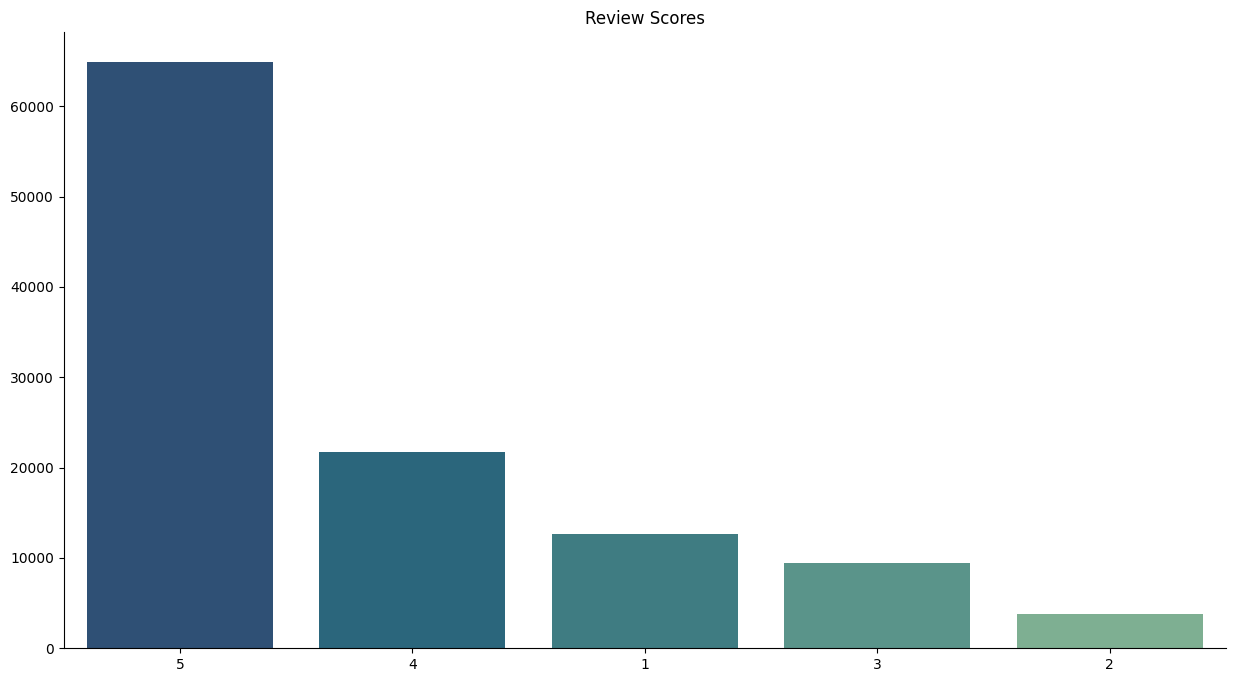

In [ ]:
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

##### " Price "

/tmp/ipython-input-830554075.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.price)


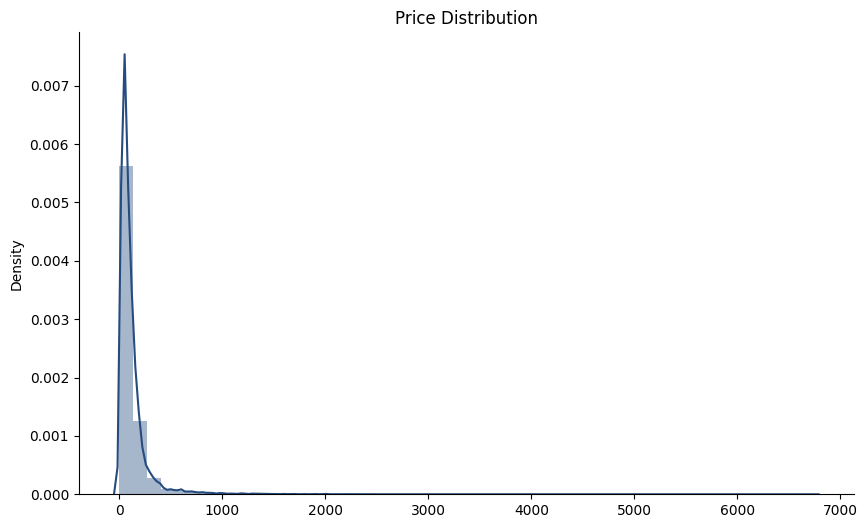

In [ ]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.price)
plt.title('Price Distribution')
sns.despine()

##### " Freight Value "

/tmp/ipython-input-366044076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.freight_value)


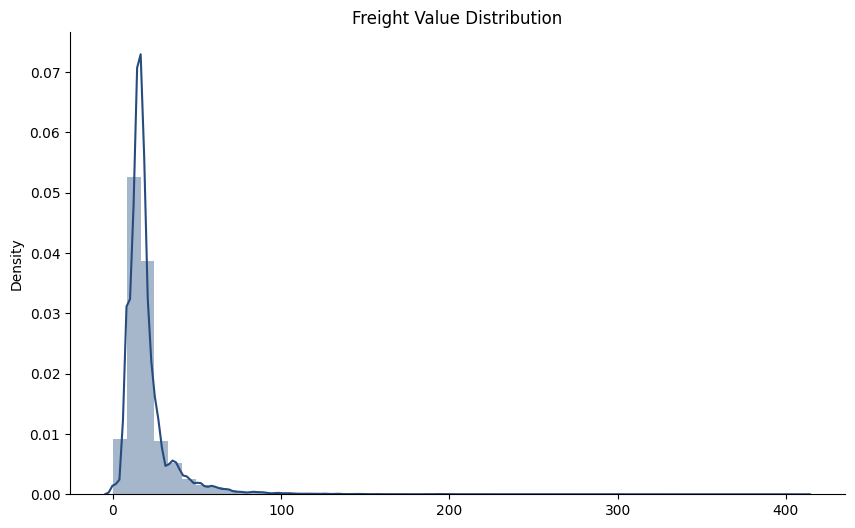

In [ ]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.freight_value)
plt.title('Freight Value Distribution')
sns.despine()

##### " Number of orders per each Category "

/tmp/ipython-input-2345443445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')


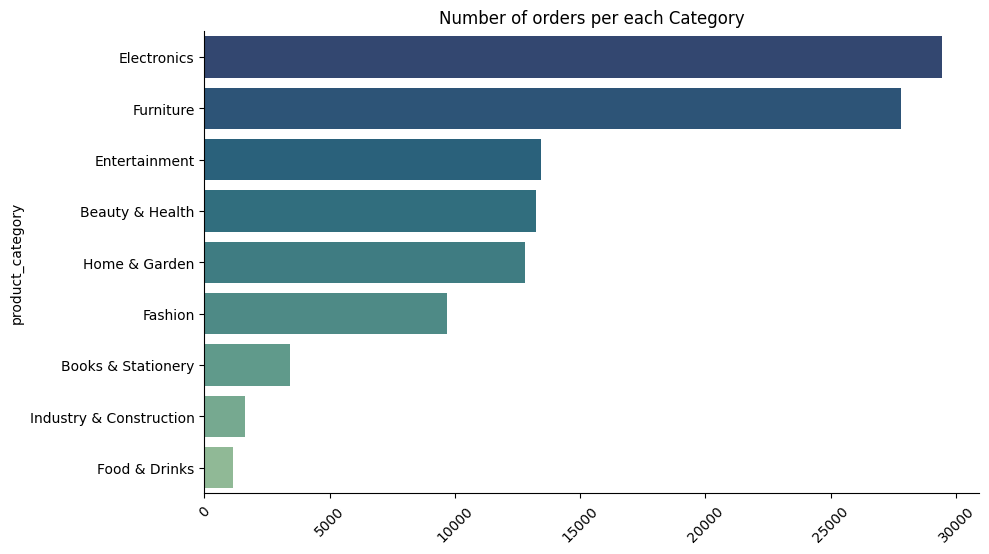

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

##### " Product Name Length "

/tmp/ipython-input-320131279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.product_name_lenght)


array([29453, 27791, 13451, 13224, 12780,  9680,  3412,  1630,  1146])

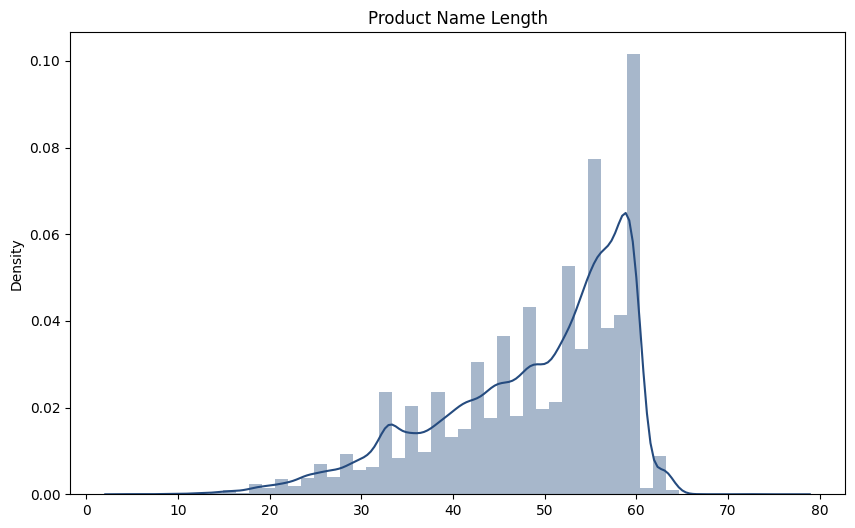

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_name_lenght)
plt.title('Product Name Length')
df.product_category.value_counts().values

##### " Product Description Length "

/tmp/ipython-input-3033893203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.product_description_lenght)


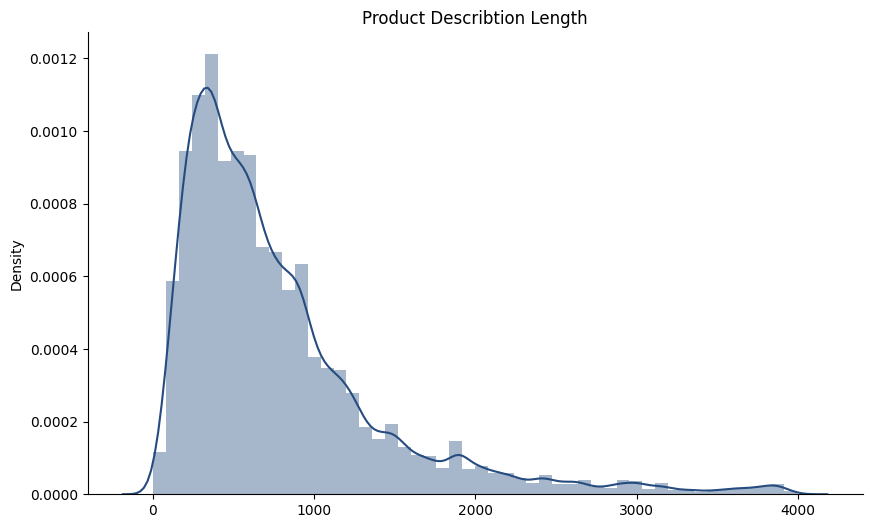

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_description_lenght)
plt.title('Product Describtion Length')
sns.despine()

##### " Product Photos Quantity "

/tmp/ipython-input-1609740692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.product_photos_qty, palette= 'crest_r')


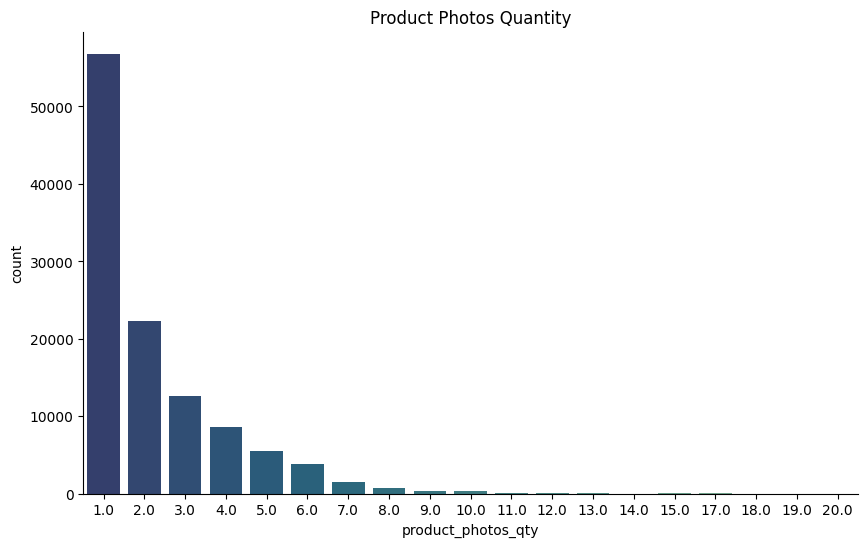

In [ ]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.product_photos_qty, palette= 'crest_r')
plt.title('Product Photos Quantity')
sns.despine()

##### " Product Weight "

/tmp/ipython-input-816650836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.product_weight_g)


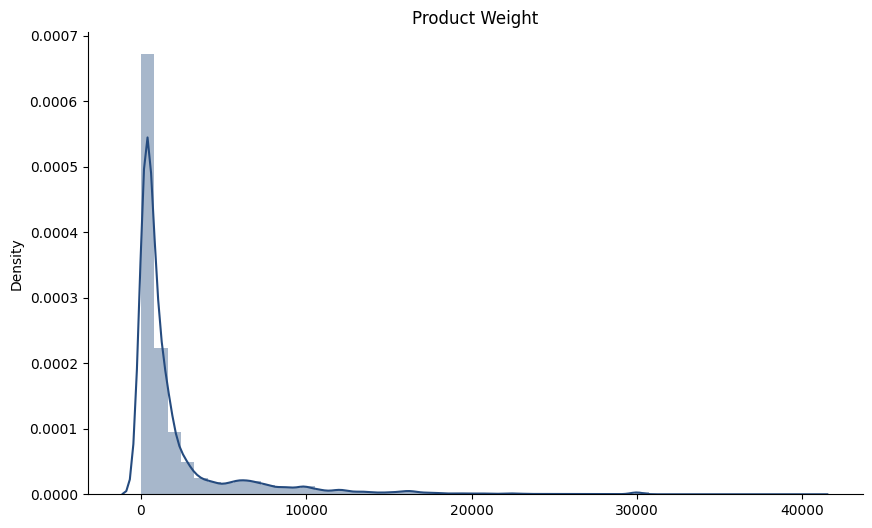

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_weight_g)
plt.title('Product Weight')
sns.despine()

##### " Product Volume "

/tmp/ipython-input-3226625640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.product_vol_cm3)


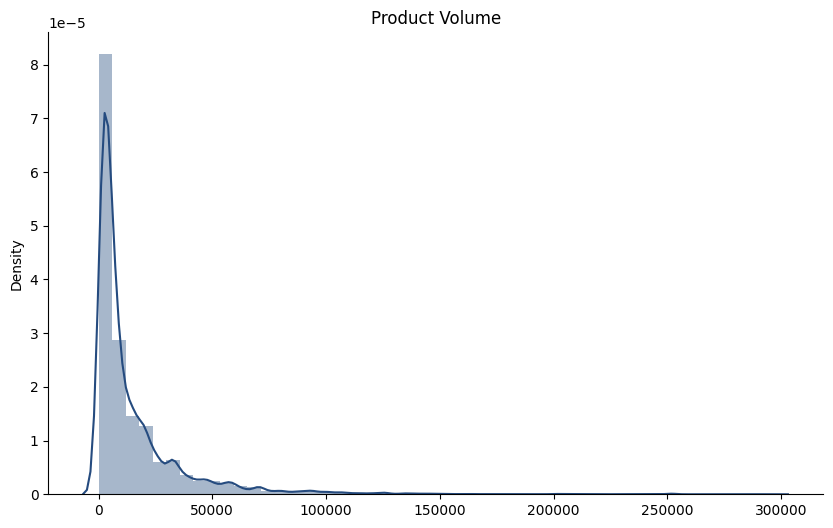

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_vol_cm3)
plt.title('Product Volume')
sns.despine()

##### " Payment Type "

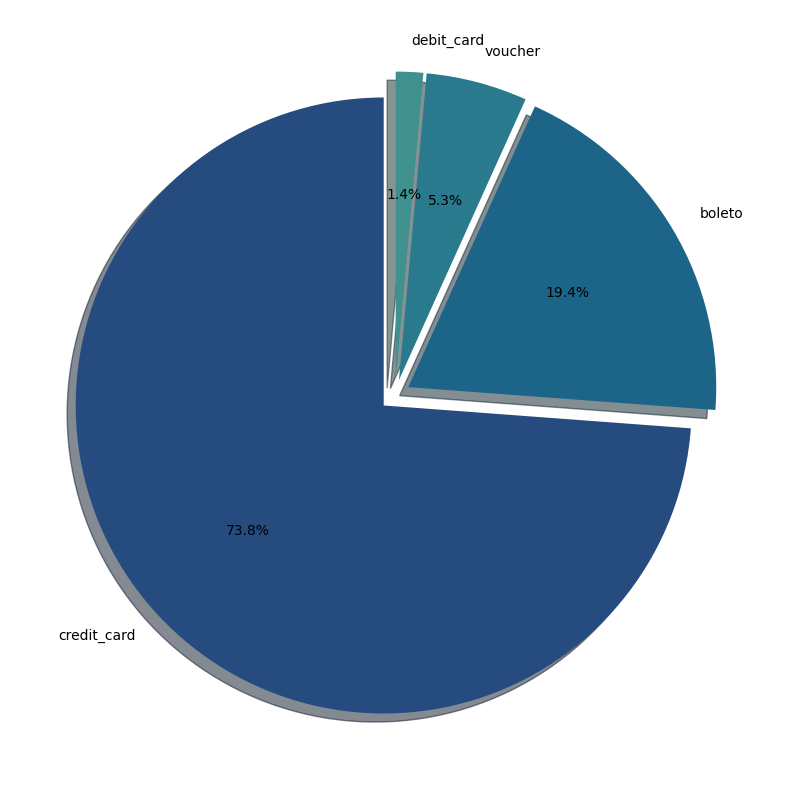

In [ ]:
plt.figure(figsize=[10, 10])
plt.pie(df.payment_type.value_counts().values, explode=(0.05, 0.05, 0.05, 0.05), labels= df.payment_type.value_counts().index, autopct='%1.1f%%',shadow=True, startangle=90);

##### " Payment Installments "

In [ ]:
df.payment_installments.value_counts()

,count
payment_installments,
1,56130
2,13095
3,11259
4,7646
10,6577
5,5778
8,4844
6,4417
7,1723


In [ ]:
df[df.payment_installments == 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
15499,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,Home & Garden,5819.0,21,8,7,OnTime/Early,OnTime/Early,Neutral,Fast,Very Fast
15500,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,Home & Garden,5819.0,21,8,7,OnTime/Early,OnTime/Early,Neutral,Fast,Very Fast
90255,5e5794daaa13f73e2f1cdb4114529843,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,744bade1fcf9ff3f31d860ace076d422,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,...,Electronics,1560.0,23,5,3,OnTime/Early,OnTime/Early,Neutral,Very Fast,Very Fast


##### Since no of installments can't be 0, we should drop these raws

In [ ]:
# Drop indices
df.drop([29113, 29114, 96733], inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True)

/tmp/ipython-input-3065364373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.payment_installments, palette= 'crest_r')


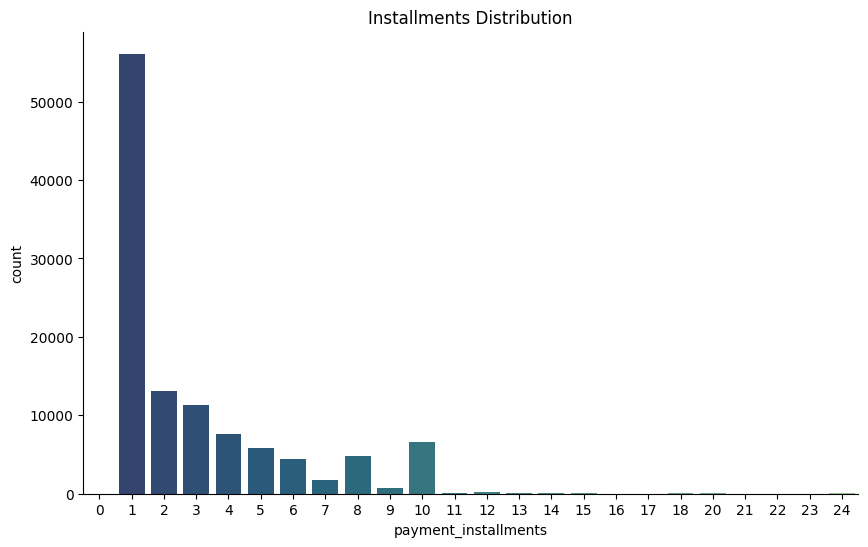

In [ ]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

##### " Payment Value "

/tmp/ipython-input-746456449.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df.payment_value)


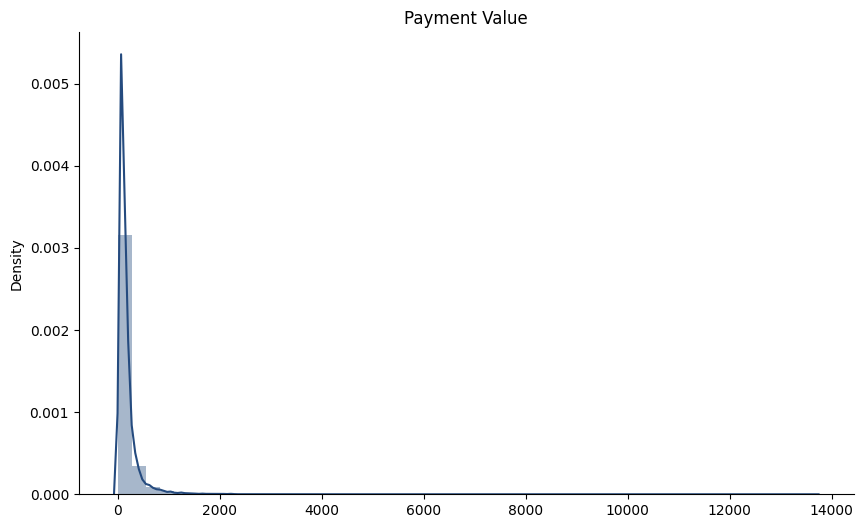

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.payment_value)
plt.title('Payment Value')
sns.despine()

##### " Top 10 Cities for Sellers "

/tmp/ipython-input-3962358493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')


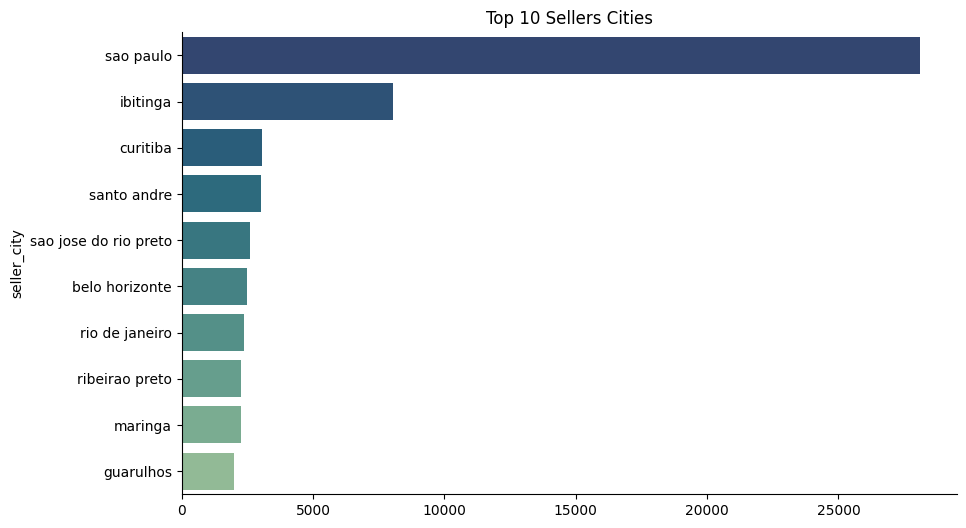

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

##### " Top 10 Sellers Capacity States  "

/tmp/ipython-input-2253734381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')


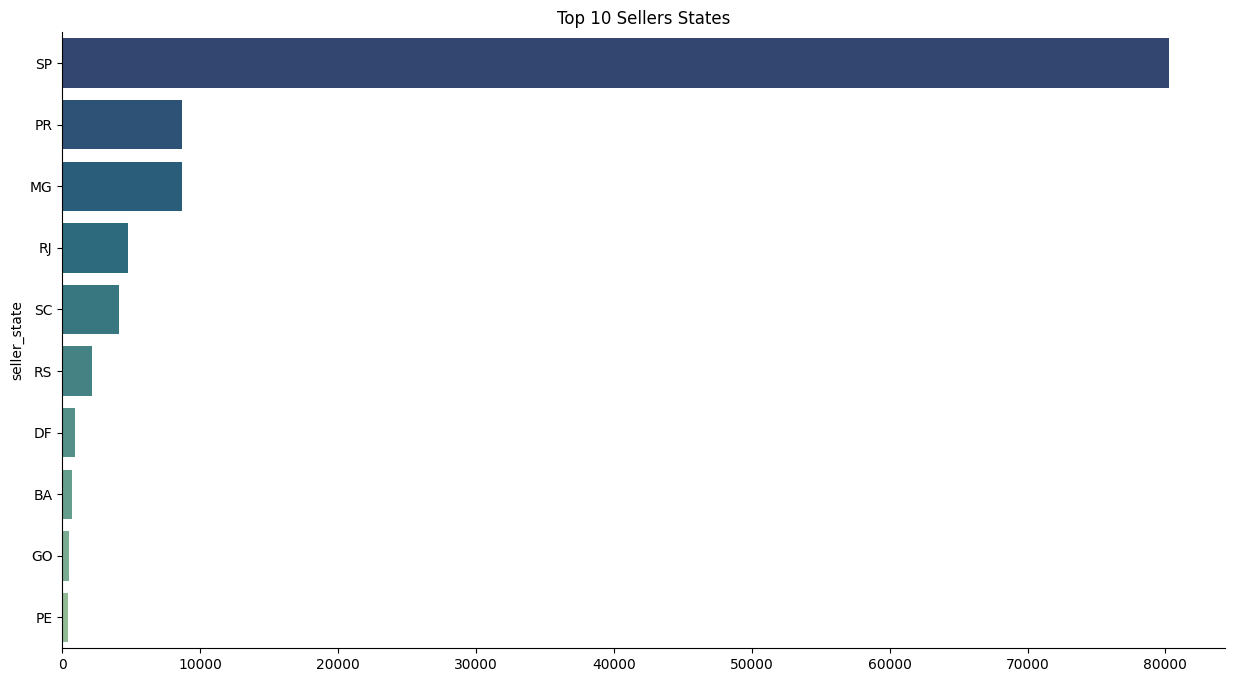

In [ ]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

### 4.2 Multivariate Analysis

### Which Cities have highest Revenue ?

/tmp/ipython-input-1788189210.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')


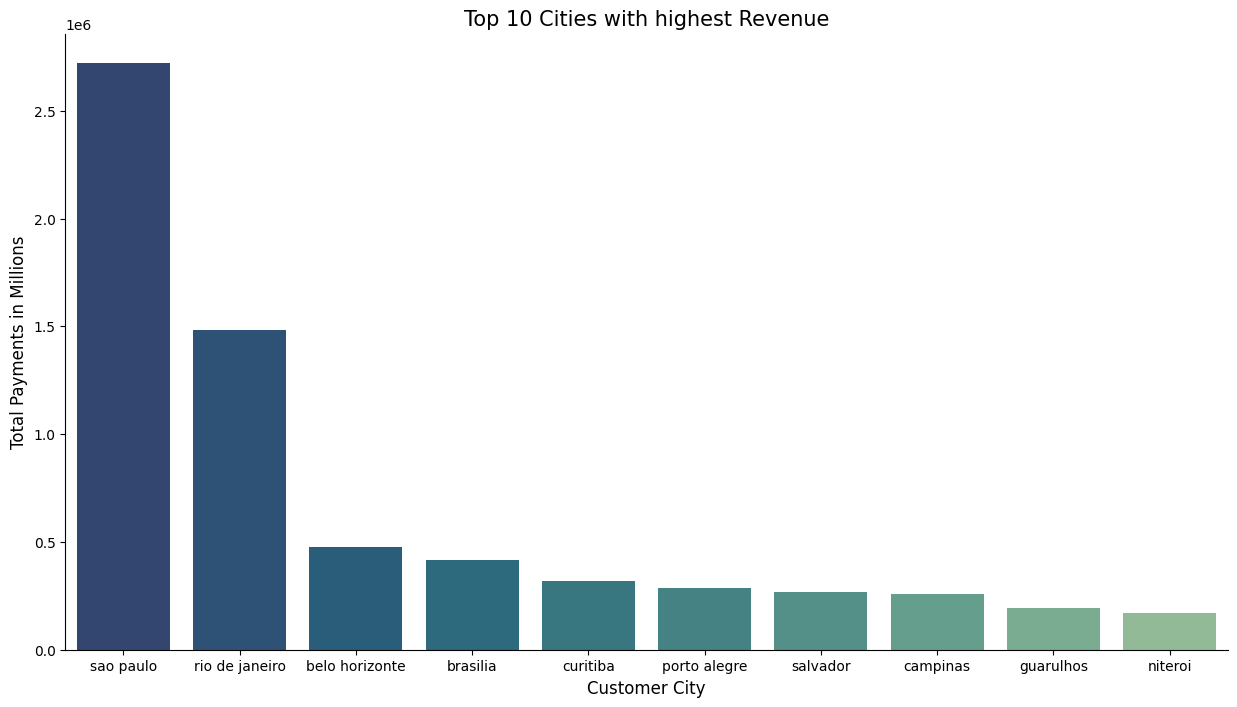

In [ ]:
# Group customer city by payment value
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

### What is the average review score for each product category ?

/tmp/ipython-input-2772210848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')


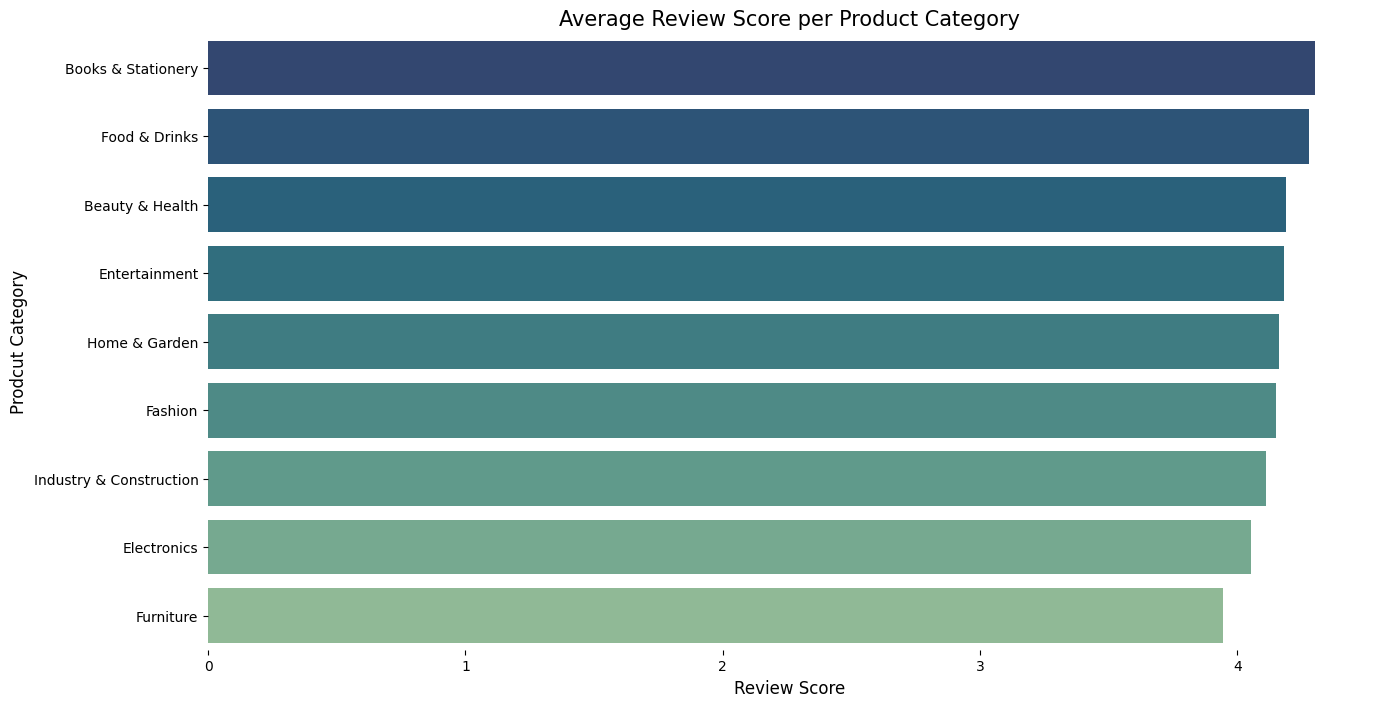

In [ ]:
# Filter product category with 4.5 or above
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are customers more likely to make larger payments using certain payment methods ?

/tmp/ipython-input-745425990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')


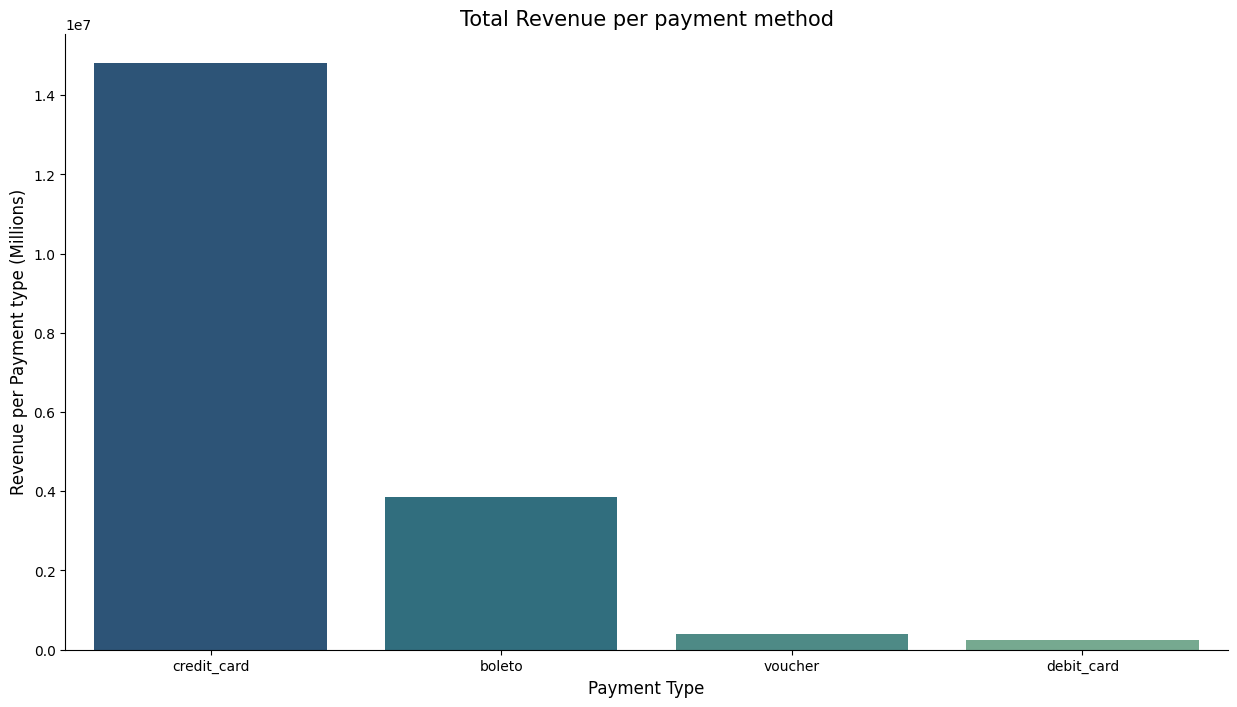

In [ ]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

/tmp/ipython-input-3006287474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')


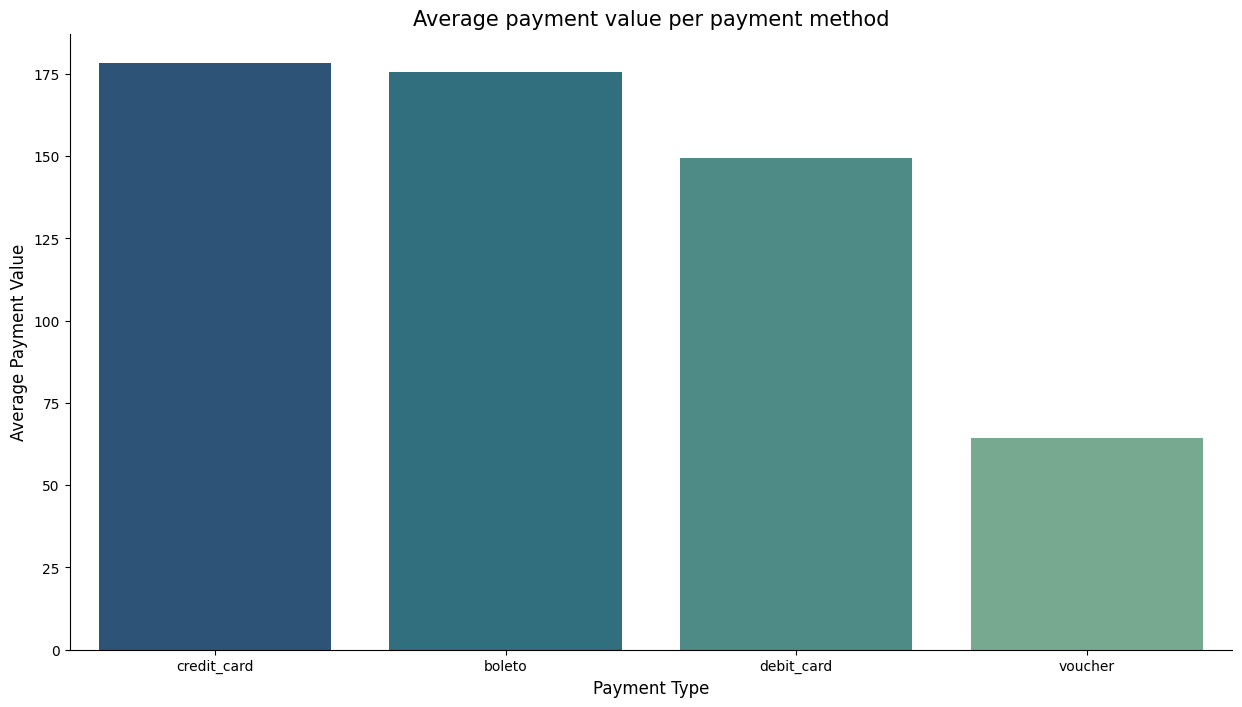

In [ ]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

### What is the average freight value for each product category ?

/tmp/ipython-input-1962936056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')


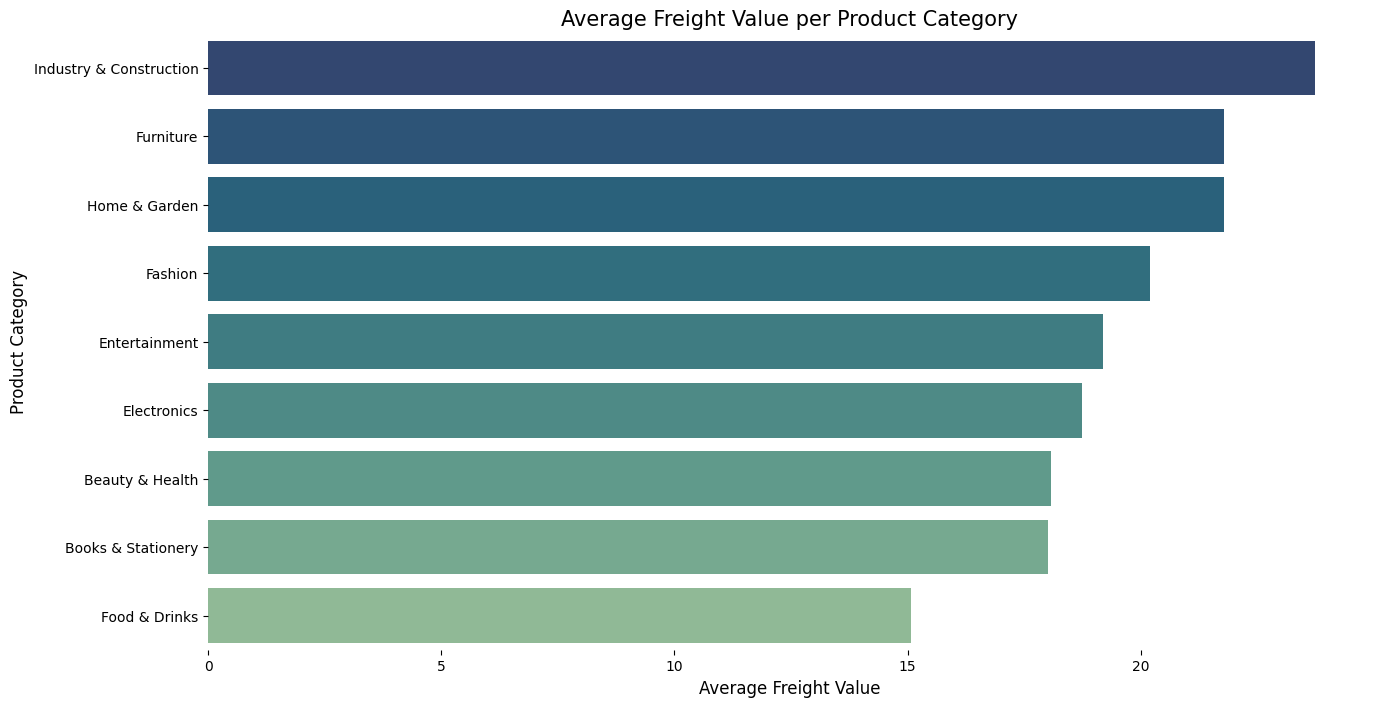

In [ ]:
# Group product category by average freight value
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### What is the average shipping time for each product Category ?

/tmp/ipython-input-275854919.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')


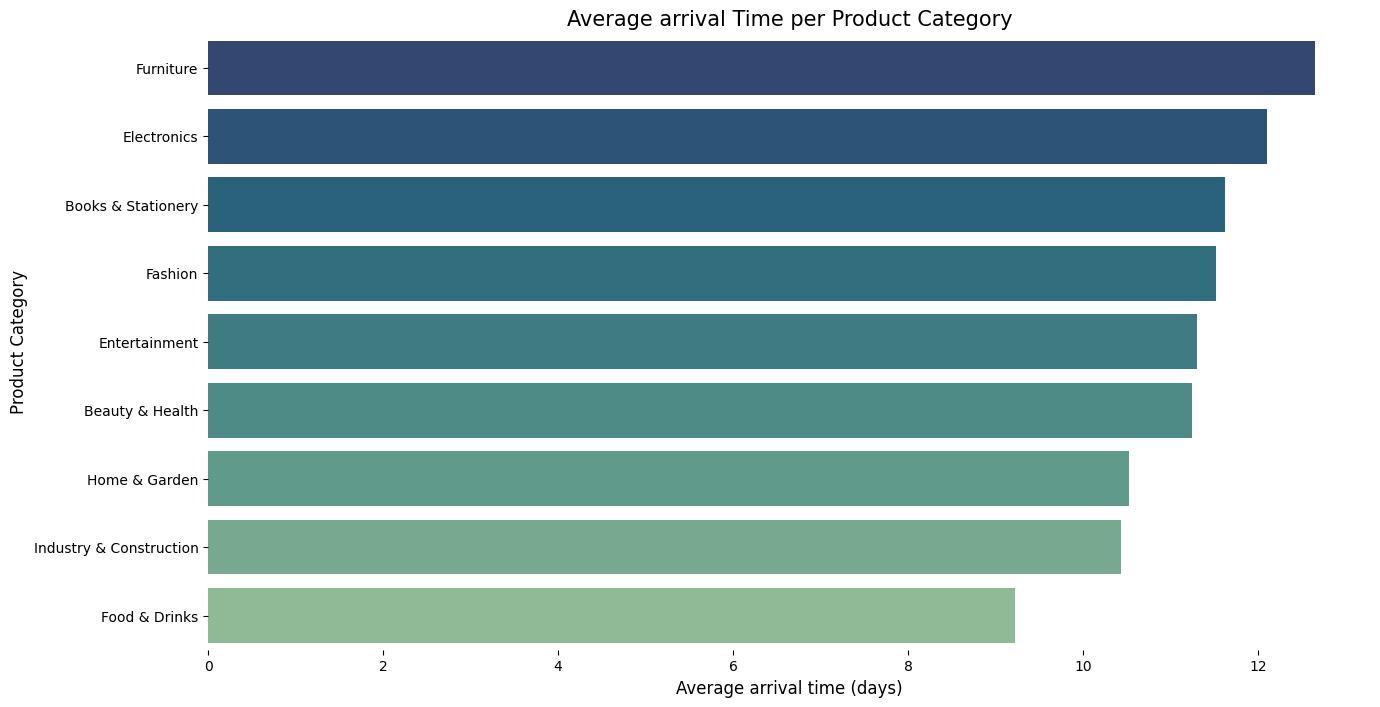

In [ ]:
# Group product category by average arrival time
ship_per_cat = df.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are Transactions done with Vouchers lead to high review score ?

<Axes: xlabel='review_score', ylabel='count'>

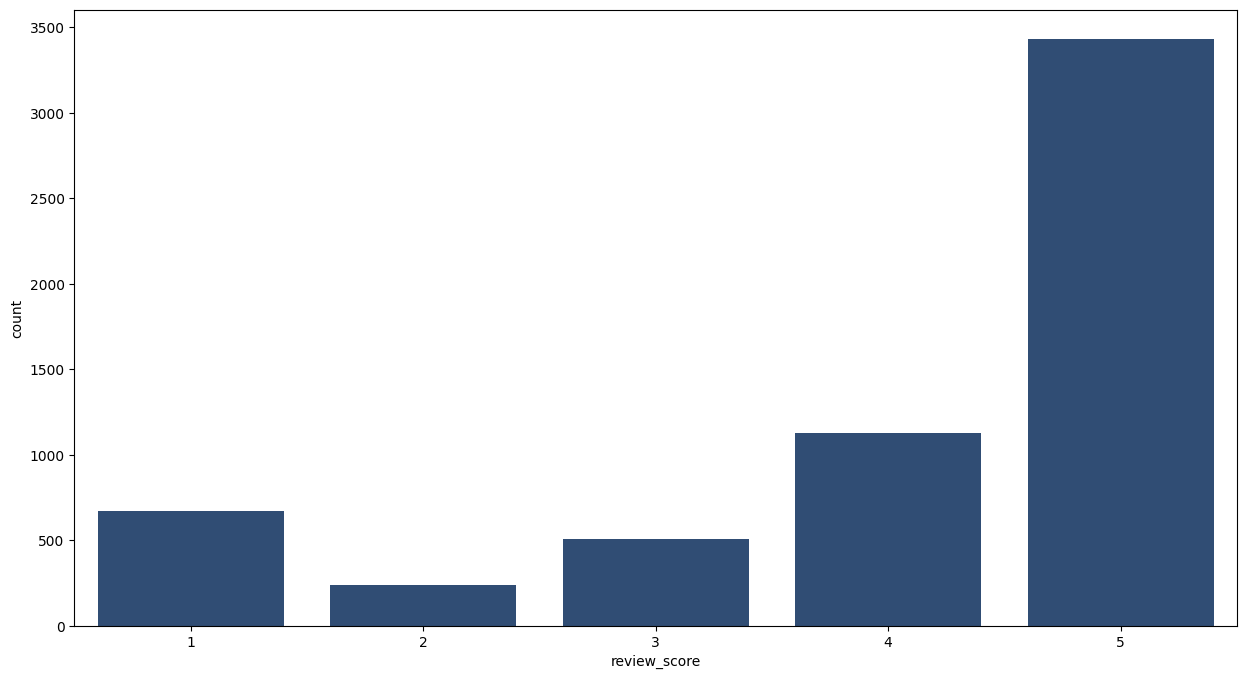

In [ ]:
plt.figure(figsize=[15, 8])
voucher_trans = df[df.payment_type == 'voucher']
sns.countplot(x= voucher_trans.review_score)

### How accurate are the estimated delivery dates provided to customers ?

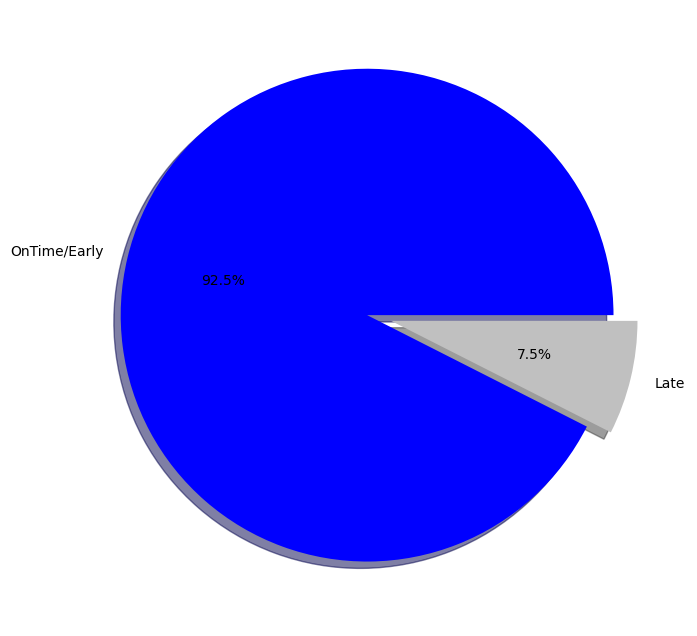

In [ ]:
plt.figure(figsize=[30,8])
Values = df.arrival_status.value_counts().values
Labels = df.arrival_status.value_counts().index
plt.pie(Values, explode=(0.05, 0.05), labels= ['OnTime/Early', 'Late'], autopct='%1.1f%%', shadow=True, colors= ('#0000FF', '#C0C0C0'));

### Distribution of products categories by location ?

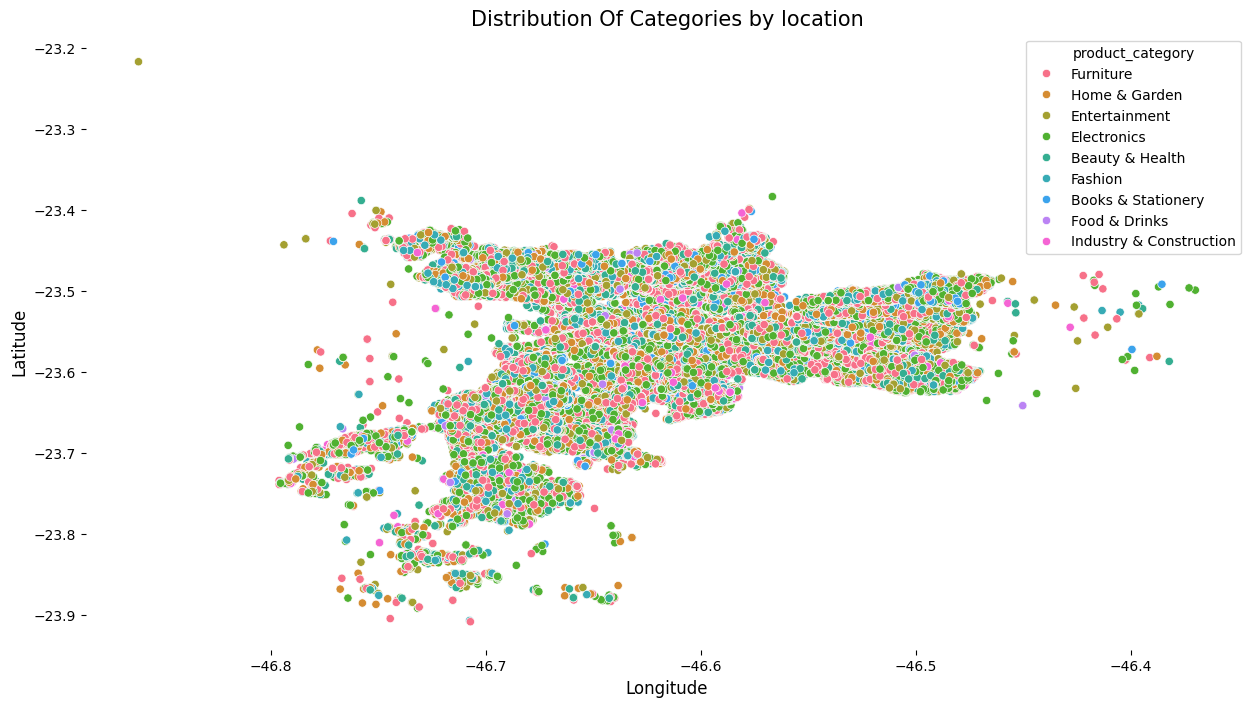

In [ ]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation_df.geolocation_lng, y = geolocation_df.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

In [ ]:
# Create copy of DataFrame
df_2 = df.copy()

# Save sample for EDA Deployment
EDA_df = df_2.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'product_category_name'], axis= 1)
EDA_sample = EDA_df.sample(frac= 1)[:10000]
EDA_sample.to_csv('EDA.csv')

# 5.0 Data Preprocessing

### 5.1 Drop Unneccessary Features

In [ ]:
# Drop all ids, zip codes, datetimes, review comment and title, product length

df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

<Axes: >

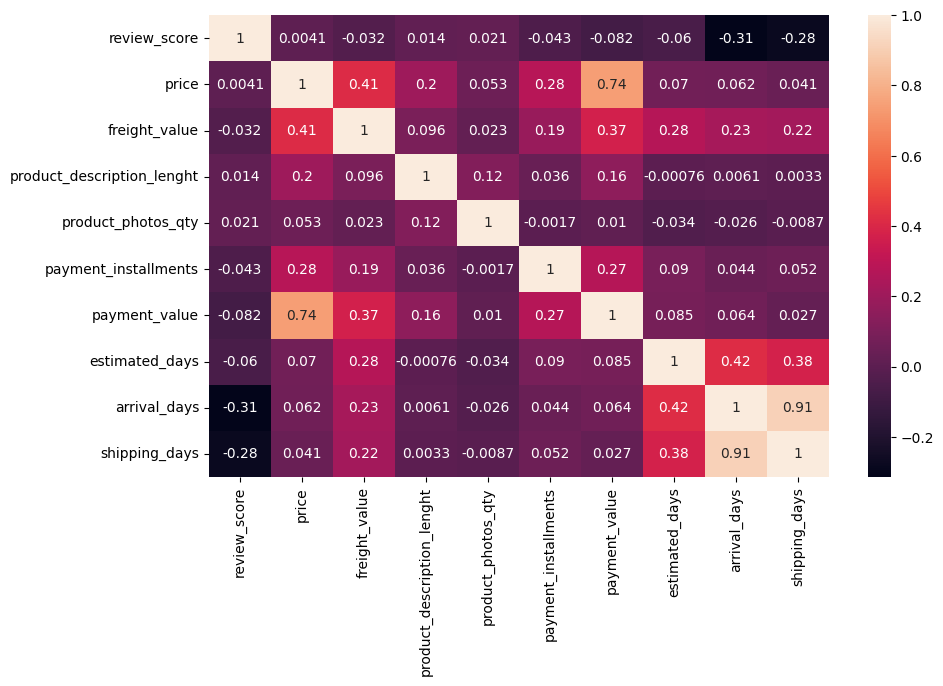

In [ ]:
# Show Correlation between Features
plt.figure(figsize= [10, 6])
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot= True)

In [ ]:
# Remove features with high correlations
df.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [ ]:
df.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,4,21.88,1141.0,1.0,credit_card,2,146.87,19,8,Late,OnTime/Early,Neutral,Fast,Very Fast
1,5,46.48,1002.0,3.0,credit_card,8,335.48,24,16,OnTime/Early,OnTime/Early,Neutral,Neutral,Fast
2,5,17.79,955.0,1.0,credit_card,7,157.73,24,26,Late,Late,Neutral,Slow,Very Fast
3,5,23.36,1066.0,1.0,credit_card,1,173.30,27,14,Late,OnTime/Early,Slow,Fast,Very Fast
4,5,22.25,407.0,1.0,credit_card,8,252.25,16,11,OnTime/Early,OnTime/Early,Neutral,Fast,Fast


#### Convert Review Score from Multiclass to Binary

In [ ]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied',
                  3 : 'Not Satisfied',
                  4 : 'Satisfied',
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

#### Split Data into Input Features & Target Variable

In [ ]:
X = df.drop('review_score', axis=1)
y = df['review_score']

### 5.2 Handling Categorical Features

#### Handling Ordinal Features ( Label Encoding)

In [ ]:
labels = {'Very Slow' : 1,
          'Slow' : 2,
          'Neutral' : 3,
          'Fast' : 4,
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

#### Handling Nominal Features ( One Hot Encoding )

In [ ]:
X = pd.get_dummies(X, drop_first=True)

#### Split Data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

### 5.3 Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

##### Plotting Featres as per importance

<Axes: >

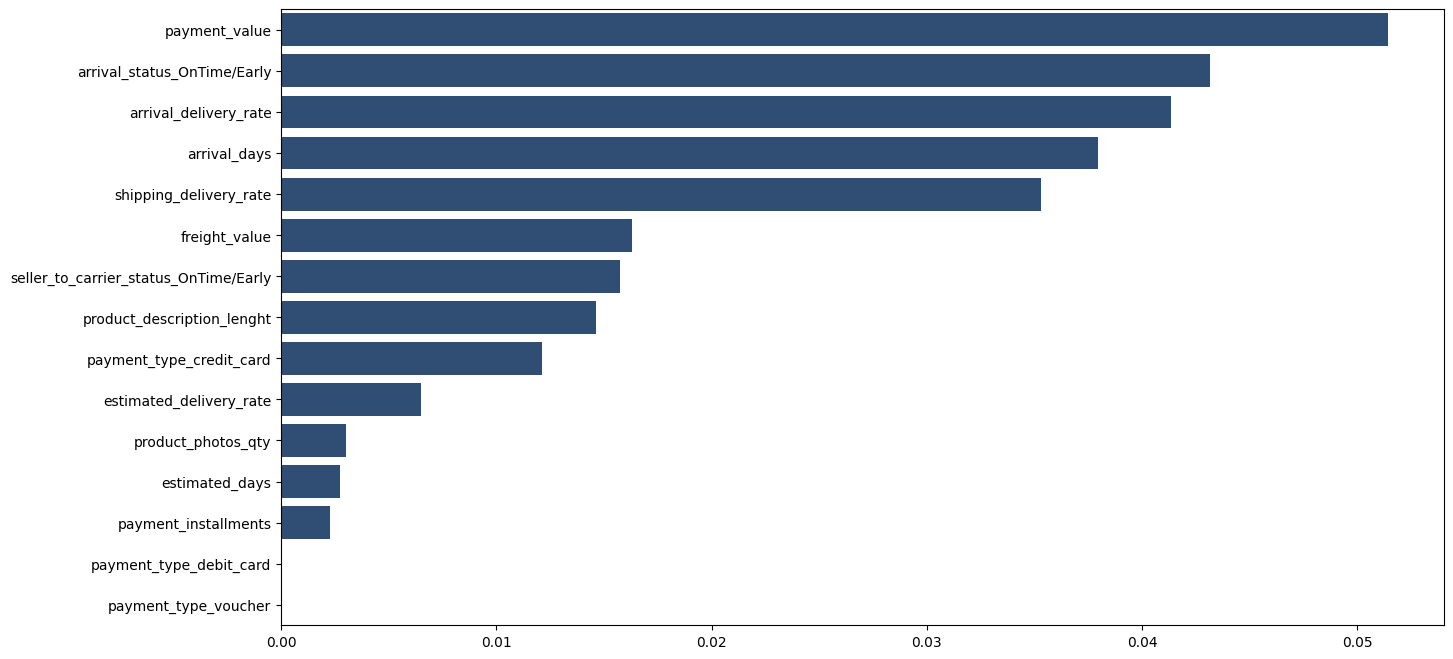

In [ ]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

#### Select best 9 Features

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [ ]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

### 5.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

### 5.5 Handling Imbalance

##### Check imbalance percentage

In [ ]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

,count
review_score,
Satisfied,76.99
Not Satisfied,23.01


##### Use SMOTE for handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 6.0 Modeling

### 6.1 Apply ML Models

### Logistic Regression

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.68      0.45      0.54     69326
    Satisfied       0.59      0.79      0.67     69326

     accuracy                           0.62    138652
    macro avg       0.63      0.62      0.61    138652
 weighted avg       0.63      0.62      0.61    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.38      0.45      0.41      5181
    Satisfied       0.83      0.79      0.81     17332

     accuracy                           0.71     22513
    macro avg       0.60      0.62      0.61     22513
 weighted avg       0.72      0.71      0.71     22513



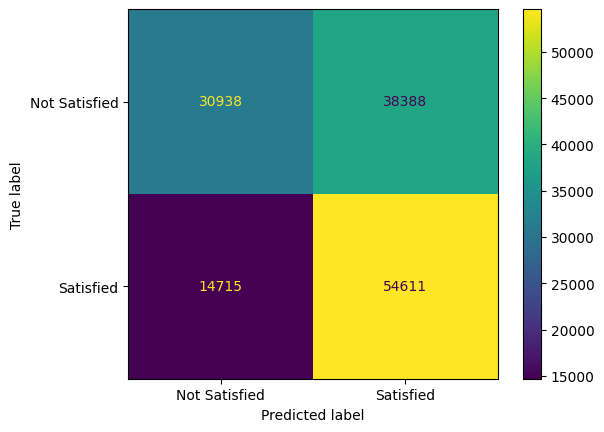

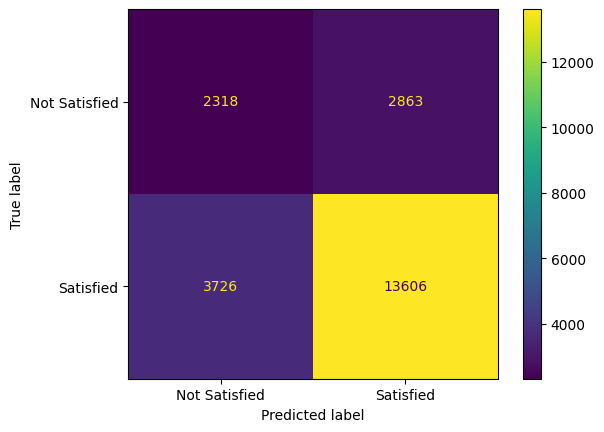

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Train model
lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(lr, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(lr, x_test_scaled, y_test)


### KNN Classifier

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.82      0.94      0.88     69326
    Satisfied       0.93      0.79      0.86     69326

     accuracy                           0.87    138652
    macro avg       0.88      0.87      0.87    138652
 weighted avg       0.88      0.87      0.87    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.36      0.59      0.45      5181
    Satisfied       0.85      0.69      0.76     17332

     accuracy                           0.67     22513
    macro avg       0.61      0.64      0.61     22513
 weighted avg       0.74      0.67      0.69     22513



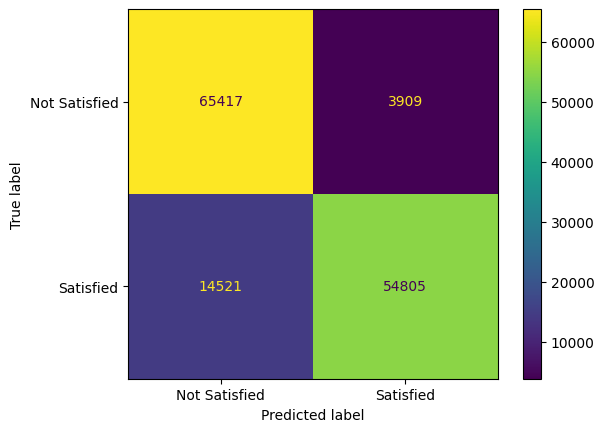

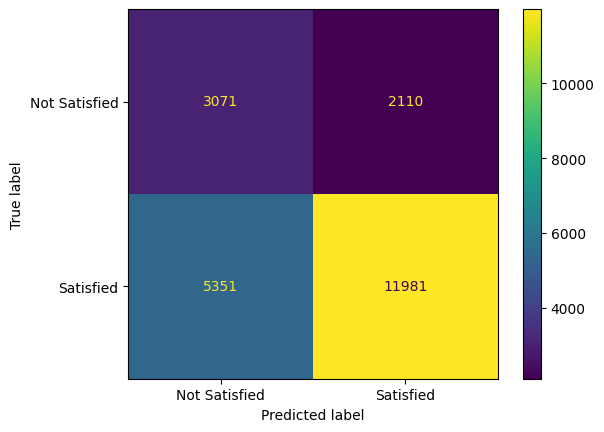

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(knn, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(knn, x_test_scaled, y_test)

### Decision Tree

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      1.00      1.00     69326
    Satisfied       1.00      0.99      1.00     69326

     accuracy                           1.00    138652
    macro avg       1.00      1.00      1.00    138652
 weighted avg       1.00      1.00      1.00    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.55      0.49      5181
    Satisfied       0.85      0.79      0.82     17332

     accuracy                           0.73     22513
    macro avg       0.65      0.67      0.65     22513
 weighted avg       0.76      0.73      0.74     22513



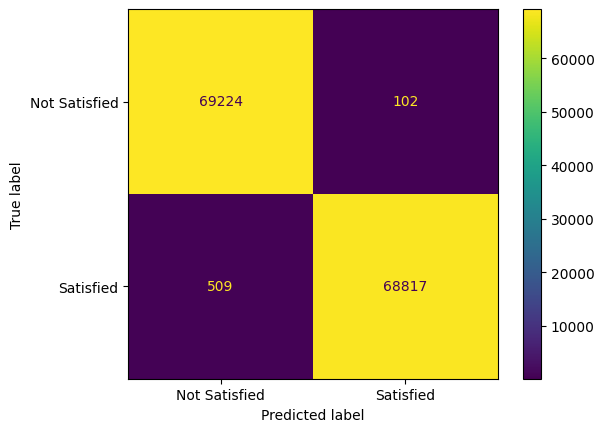

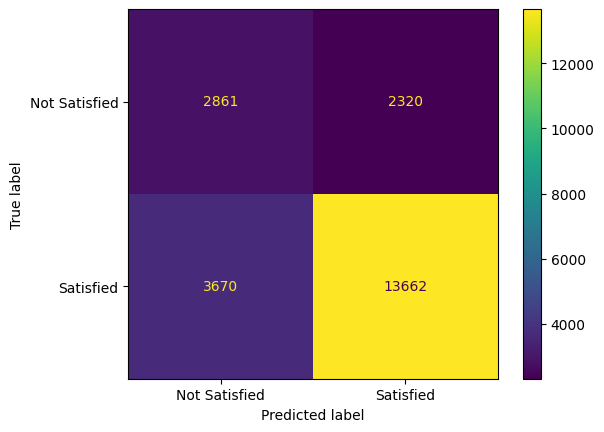

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(dt, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(dt, x_test_scaled, y_test)


### Random Forest

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      0.99      1.00     69326
    Satisfied       0.99      1.00      1.00     69326

     accuracy                           1.00    138652
    macro avg       1.00      1.00      1.00    138652
 weighted avg       1.00      1.00      1.00    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.58      0.51      0.55      5181
    Satisfied       0.86      0.89      0.87     17332

     accuracy                           0.80     22513
    macro avg       0.72      0.70      0.71     22513
 weighted avg       0.80      0.80      0.80     22513



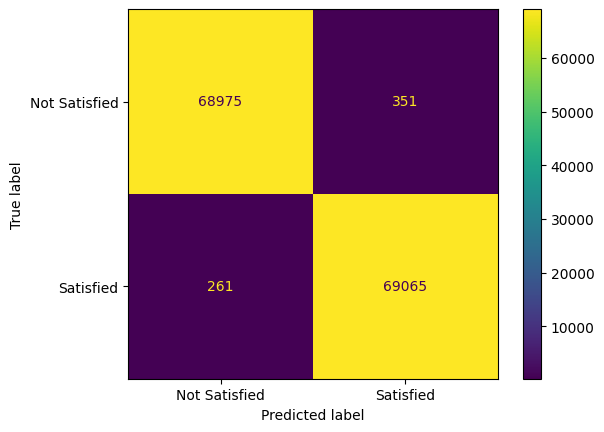

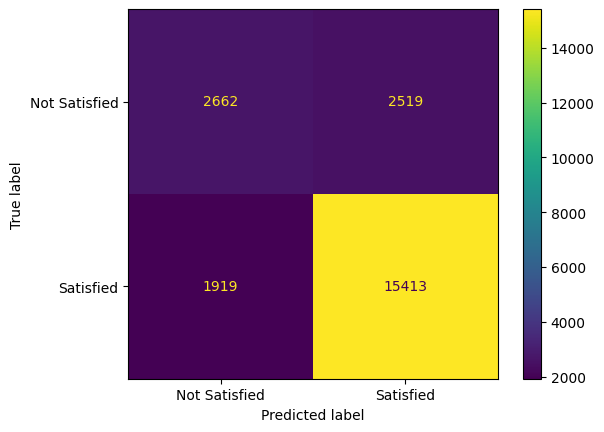

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(rf, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(rf, x_test_scaled, y_test)


### Ada Boost

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.70      0.44      0.54     69326
    Satisfied       0.59      0.81      0.68     69326

     accuracy                           0.63    138652
    macro avg       0.65      0.63      0.61    138652
 weighted avg       0.65      0.63      0.61    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.40      0.43      0.41      5181
    Satisfied       0.83      0.81      0.82     17332

     accuracy                           0.72     22513
    macro avg       0.61      0.62      0.62     22513
 weighted avg       0.73      0.72      0.72     22513



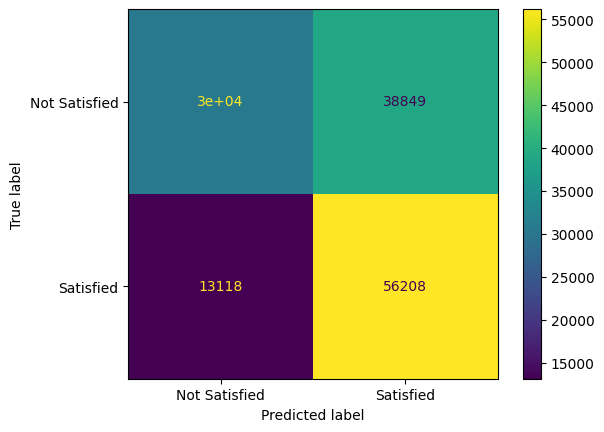

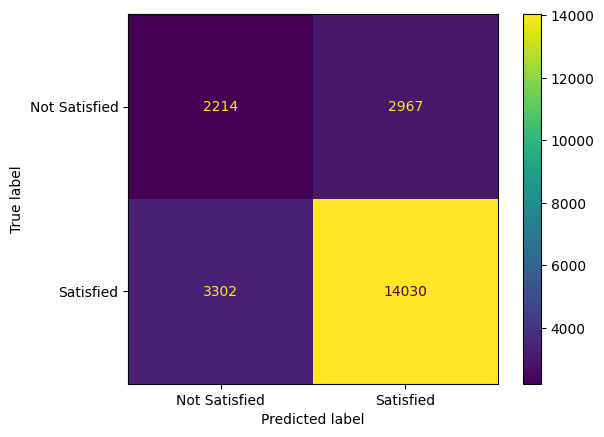

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train AdaBoost
ad = AdaBoostClassifier(random_state=42)
ad.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, ad.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, ad.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(ad, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(ad, x_test_scaled, y_test)


### XGboost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:06:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation on Training 
               precision    recall  f1-score   support

           0       0.85      0.64      0.73     69326
           1       0.71      0.89      0.79     69326

    accuracy                           0.76    138652
   macro avg       0.78      0.76      0.76    138652
weighted avg       0.78      0.76      0.76    138652

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.48      0.42      0.45      5181
           1       0.83      0.87      0.85     17332

    accuracy                           0.76     22513
   macro avg       0.66      0.64      0.65     22513
weighted avg       0.75      0.76      0.76     22513



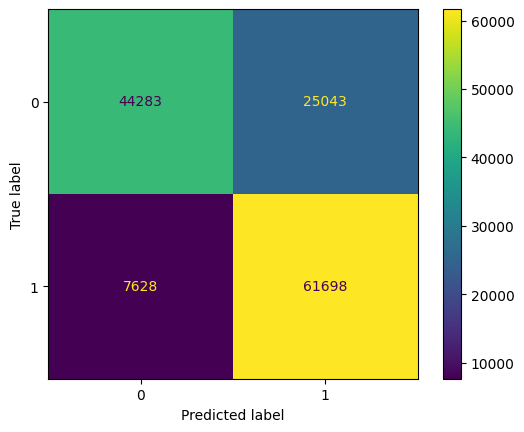

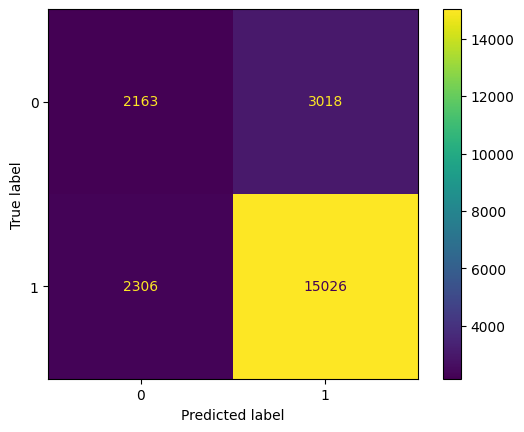

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Encode labels
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.transform(y_test)   # <-- use transform, not fit_transform (important!)

# Train XGBoost
xg = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xg.fit(x_train_resampled, y_train_xg)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(xg, x_train_resampled, y_train_xg)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(xg, x_test_scaled, y_test_xg)


### Naive Bayes

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.71      0.37      0.49     69326
    Satisfied       0.57      0.85      0.69     69326

     accuracy                           0.61    138652
    macro avg       0.64      0.61      0.59    138652
 weighted avg       0.64      0.61      0.59    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.42      0.37      0.39      5181
    Satisfied       0.82      0.85      0.83     17332

     accuracy                           0.74     22513
    macro avg       0.62      0.61      0.61     22513
 weighted avg       0.73      0.74      0.73     22513



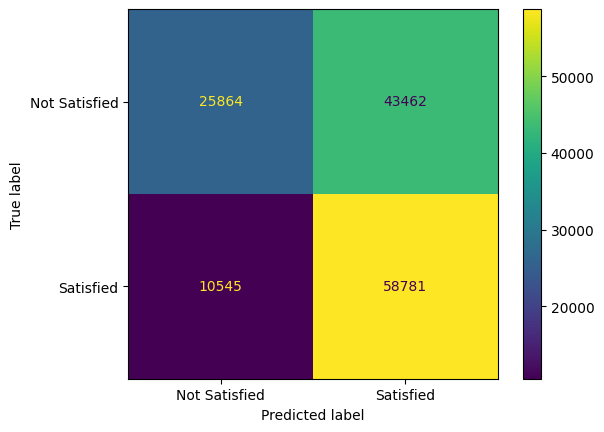

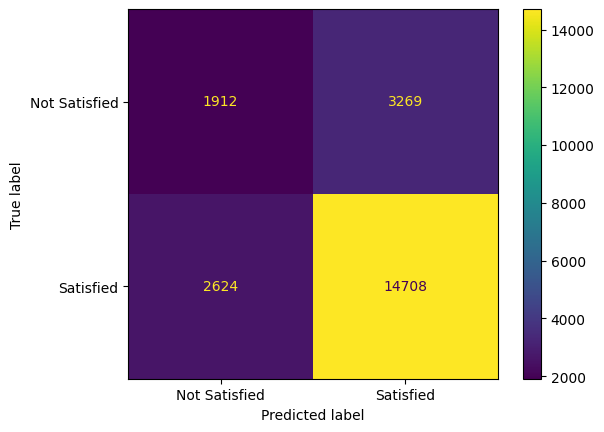

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train Naive Bayes
nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, nb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(nb, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(nb, x_test_scaled, y_test)


### LightGBM

[LightGBM] [Info] Number of positive: 69326, number of negative: 69326
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1566
[LightGBM] [Info] Number of data points in the train set: 138652, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.87      0.57      0.69     69326
    Satisfied       0.68      0.92      0.78     69326

     accuracy                           0.74    138652
    macro avg       0.78      0.74      0.73    138652
 weighted avg       0.78      0.74      0.73    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.53      0.35      0.42      5181
    

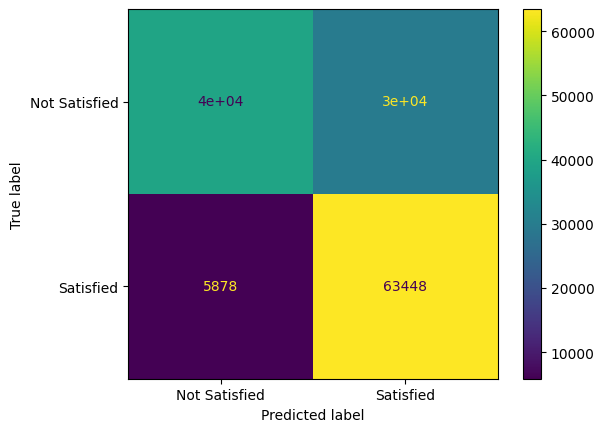

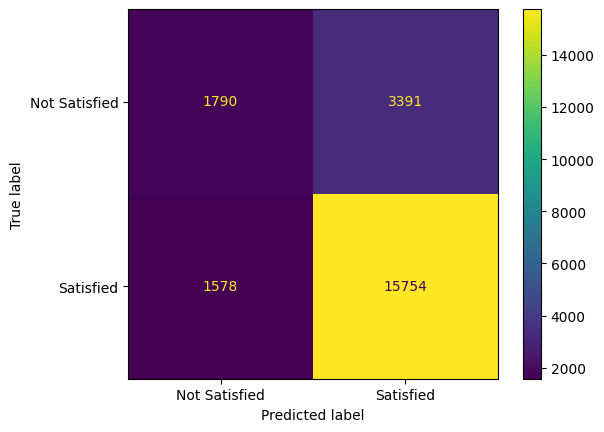

In [ ]:
import lightgbm as ltb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train LightGBM
lg = ltb.LGBMClassifier(random_state=42)
lg.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, lg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lg.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(lg, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(lg, x_test_scaled, y_test)


In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


### CatBoost

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.90      0.63      0.74     69326
    Satisfied       0.71      0.93      0.81     69326

     accuracy                           0.78    138652
    macro avg       0.81      0.78      0.77    138652
 weighted avg       0.81      0.78      0.77    138652

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.56      0.35      0.43      5181
    Satisfied       0.83      0.92      0.87     17332

     accuracy                           0.79     22513
    macro avg       0.69      0.63      0.65     22513
 weighted avg       0.76      0.79      0.77     22513



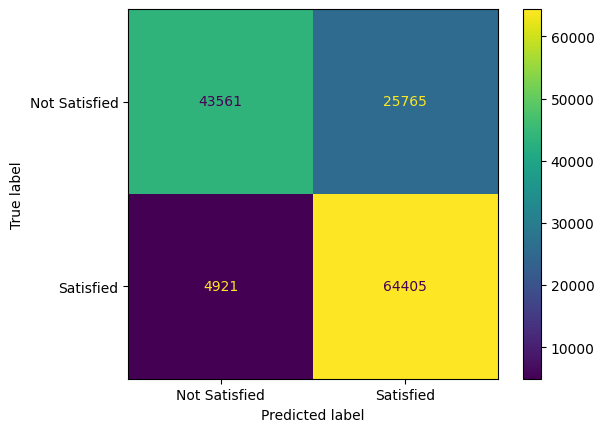

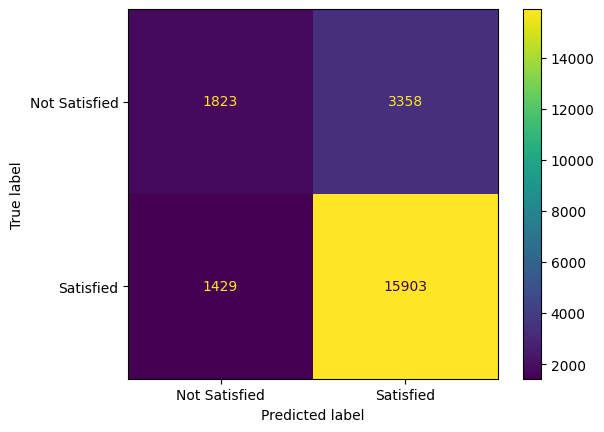

In [ ]:
import catboost as cb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train CatBoost
cat = cb.CatBoostClassifier(verbose=0, random_state=42)  # suppress training logs
cat.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, cat.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, cat.predict(x_test_scaled)))

# Confusion Matrix - Training
ConfusionMatrixDisplay.from_estimator(cat, x_train_resampled, y_train_resampled)

# Confusion Matrix - Testing
ConfusionMatrixDisplay.from_estimator(cat, x_test_scaled, y_test)


### 6.2 Hyperparameter Tuning

#### XGboost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 7, 8],
    'n_estimators': [100, 200]
    }
grid_search = GridSearchCV(xg, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_xg)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:10:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:10:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:10:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:10:07] WARNING: /w

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 7, 8],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
final_xg_model = XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200)
final_xg_model.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     69326
           1       0.79      0.93      0.86     69326

    accuracy                           0.84    138652
   macro avg       0.85      0.84      0.84    138652
weighted avg       0.85      0.84      0.84    138652

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.52      0.44      0.48      5181
           1       0.84      0.88      0.86     17332

    accuracy                           0.78     22513
   macro avg       0.68      0.66      0.67     22513
weighted avg       0.77      0.78      0.77     22513



In [ ]:
#param_grid = {
    #'learning_rate': [0.1, 0.2],
    #'depth': [5, 7, 8],
   #'iterations': [100, 200]}

#grid_search = GridSearchCV(cb, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
#grid_search.fit(x_train_resampled, y_train_resampled)
#grid_search.best_params_

In [ ]:
import catboost as cb
final_cb_model = cb.CatBoostClassifier(depth= 7, iterations= 200, learning_rate= 0.2)
final_cb_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_cb_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_cb_model.predict(x_test_scaled)))

0:	learn: 0.6676396	total: 198ms	remaining: 39.3s
1:	learn: 0.6509992	total: 345ms	remaining: 34.1s
2:	learn: 0.6332452	total: 506ms	remaining: 33.2s
3:	learn: 0.6218904	total: 628ms	remaining: 30.8s
4:	learn: 0.6163532	total: 741ms	remaining: 28.9s
5:	learn: 0.6093099	total: 870ms	remaining: 28.1s
6:	learn: 0.6064534	total: 1.02s	remaining: 28.1s
7:	learn: 0.6030657	total: 1.17s	remaining: 28s
8:	learn: 0.6003538	total: 1.32s	remaining: 28s
9:	learn: 0.5966497	total: 1.47s	remaining: 27.8s
10:	learn: 0.5926846	total: 1.63s	remaining: 27.9s
11:	learn: 0.5865641	total: 1.92s	remaining: 30s
12:	learn: 0.5826396	total: 2.21s	remaining: 31.9s
13:	learn: 0.5801170	total: 2.4s	remaining: 31.8s
14:	learn: 0.5779904	total: 2.51s	remaining: 31s
15:	learn: 0.5737676	total: 2.59s	remaining: 29.8s
16:	learn: 0.5722292	total: 2.76s	remaining: 29.7s
17:	learn: 0.5706871	total: 2.88s	remaining: 29.1s
18:	learn: 0.5695789	total: 3.01s	remaining: 28.7s
19:	learn: 0.5687220	total: 3.16s	remaining: 28.4s

#### RandomForest

In [ ]:
#param_grid = {
    #'max_depth': [8, 9, 10],
    #'n_estimators': [100, 200]
    }
#grid_search = GridSearchCV(rf, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
#grid_search.fit(x_train_resampled, y_train_resampled)
#grid_search.best_params_

In [ ]:
final_rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.78      0.54      0.64     69326
    Satisfied       0.65      0.85      0.73     69326

     accuracy                           0.69    138652
    macro avg       0.71      0.69      0.69    138652
 weighted avg       0.71      0.69      0.69    138652

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.43      0.44      5181
    Satisfied       0.83      0.84      0.83     17332

     accuracy                           0.74     22513
    macro avg       0.64      0.63      0.64     22513
 weighted avg       0.74      0.74      0.74     22513



#### Select XGboost for pipeline as it provides highest performance on testing

# 7.0 Pipeline

In [ ]:
df_pipeline = df.copy()
df_pipeline.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,Satisfied,21.88,1141.0,1.0,credit_card,2,146.87,19,8,Late,OnTime/Early,Neutral,Fast,Very Fast
1,Satisfied,46.48,1002.0,3.0,credit_card,8,335.48,24,16,OnTime/Early,OnTime/Early,Neutral,Neutral,Fast
2,Satisfied,17.79,955.0,1.0,credit_card,7,157.73,24,26,Late,Late,Neutral,Slow,Very Fast
3,Satisfied,23.36,1066.0,1.0,credit_card,1,173.30,27,14,Late,OnTime/Early,Slow,Fast,Very Fast
4,Satisfied,22.25,407.0,1.0,credit_card,8,252.25,16,11,OnTime/Early,OnTime/Early,Neutral,Fast,Fast


#### Encoding Review score to 0 and 1

In [ ]:
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

### Split Input Features and Targe Variable

In [ ]:
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

### Split into Train & Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

### Prepare Numerical Features

In [ ]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')),
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

### Prepare Categorical Features

In [ ]:
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [ ]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='median')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dty...
                                ('Cat Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoding',
                                                  OneHotEncoder(drop='first')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object'))])

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()),
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
import joblib
joblib.dump(final_pipeline, 'Brazilian Ecommerce Classification.bkl')

['Brazilian Ecommerce Classification.bkl']

# 11.0 Wrap up & Conclusion

#### 1- Apply Feature Engineering for some datetime features which are very important in the analysis.
#### 2- Make EDA to gain useful insights like how accurate are estimated delivery dates provided by the website (93.8% Early/OnTime, 6.2% Late).
#### 3- Apply Feature Selection to check best features, where we found that shipping features were important.
#### 4- Apply different ML models to predict customer satisfaction either Satisfied or Non-Satisfied